# Download data with GEO library and transform it to expression matrix. Example GSE15222

In [1]:
suppressPackageStartupMessages(library(GEOquery))
suppressPackageStartupMessages(library(affy,gcrma))

#### 1. Load series and platform data from GEO

In [2]:
my.gse <- "GSE15222"
path="/mnt/data/GWES/Microarray/output/geo_downloads"
dir.create(file.path(path))

Warning message in dir.create(file.path(path)):
"'/mnt/data/GWES/Microarray/output/geo_downloads' already exists"


In [3]:
# Get data from GEO
# This step is a bit slow because of download and reformatting
my.geo.gse <- getGEO(GEO=my.gse, filename=NULL, destdir=path, GSElimits=NULL, GSEMatrix=TRUE, AnnotGPL=FALSE, getGPL=FALSE)

Found 1 file(s)

GSE15222_series_matrix.txt.gz


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  ID_REF = col_character()
)
i Use `spec()` for the full column specifications.




In [4]:
# Inspect data downloaded
str(my.geo.gse)

List of 1
 $ GSE15222_series_matrix.txt.gz:Formal class 'ExpressionSet' [package "Biobase"] with 7 slots
  .. ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  .. .. .. ..@ name             : chr "Amanda,,Myers"
  .. .. .. ..@ lab              : chr ""
  .. .. .. ..@ contact          : chr ""
  .. .. .. ..@ title            : chr "Genetic control of human brain transcript expression in Alzheimer\342\200\231s disease."
  .. .. .. ..@ abstract         : chr "We recently surveyed the relationship between the human brain transcriptome and genome in a series of neuropath"| __truncated__
  .. .. .. ..@ url              : chr "https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE15222"
  .. .. .. ..@ pubMedIds        : chr "19361613"
  .. .. .. ..@ samples          : list()
  .. .. .. ..@ hybridizations   : list()
  .. .. .. ..@ normControls     : list()
  .. .. .. ..@ preprocessing    : list()
  .. .. .. ..@ other            :List of 23
  .. .. .. .. ..$ contact

In [5]:
# get rid of list structure
my.geo.gse<-my.geo.gse[[1]]

In [6]:
colnames(pData(my.geo.gse))

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "characteristics_ch1.3"   "molecule_ch1"           
[15] "extract_protocol_ch1"    "extract_protocol_ch1.1" 
[17] "label_ch1"               "label_protocol_ch1"     
[19] "taxid_ch1"               "hyb_protocol"           
[21] "scan_protocol"           "description"            
[23] "description.1"           "data_processing"        
[25] "platform_id"             "contact_name"           
[27] "contact_department"      "contact_institute"      
[29] "contact_address"         "contact_city"           
[31] "contact_state"           "contact_zip/postal_code"
[33] "contact_country"         "supplementary_file"     
[35] "data_row_count"          "age:ch1"                
[37] "gender:ch1"              "pmi:ch1"                
[39] "tissue:ch1"

In [7]:
head(pData(phenoData(my.geo.gse)),4)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age:ch1,gender:ch1,pmi:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM225652,WGACON-1,GSM225652,Public on Nov 04 2007,Aug 29 2007,Apr 01 2009,RNA,1,neuropathologically normal frozen temporal cortex,Homo sapiens,"GENDER_male,AGE_85,PMI_3.16,TRANSDET_WHOLE_0.484,TRANSDET_CORTEX_0.836,HYBDATE_3.9.2006,BRAINBANK_A",...,Miami,FL,33136,USA,NONE,24354,NA,NA,NA,NA
GSM225662,WGACON-6,GSM225662,Public on Nov 04 2007,Aug 29 2007,Apr 01 2009,RNA,1,neuropathologically normal frozen temporal cortex,Homo sapiens,"GENDER_male,AGE_85,PMI_2.5,TRANSDET_WHOLE_0.367,TRANSDET_CORTEX_0.633,HYBDATE_3.9.2006,BRAINBANK_A",...,Miami,FL,33136,USA,NONE,24354,NA,NA,NA,NA
GSM225664,WGACON-7,GSM225664,Public on Nov 04 2007,Aug 29 2007,Apr 01 2009,RNA,1,neuropathologically normal frozen temporal cortex,Homo sapiens,"GENDER_male,AGE_79,PMI_1.66,TRANSDET_WHOLE_0.445,TRANSDET_CORTEX_0.765,HYBDATE_3.9.2006,BRAINBANK_A",...,Miami,FL,33136,USA,NONE,24354,NA,NA,NA,NA
GSM225665,WGACON-9,GSM225665,Public on Nov 04 2007,Aug 29 2007,Apr 01 2009,RNA,1,neuropathologically normal frozen temporal cortex,Homo sapiens,"GENDER_female,AGE_85,PMI_2.75,TRANSDET_WHOLE_0.403,TRANSDET_CORTEX_0.695,HYBDATE_8.31.2006,BRAINBANK_A",...,Miami,FL,33136,USA,NONE,24354,NA,NA,NA,NA


**Get info from this dataset**

In [8]:
pData(my.geo.gse)$data_processing[1]

[1] "RNA: Beadstudio software v 1.5.0.34, rank invariant normalization to extract, log10 transformation before analysis"

**This tells us that the data needs to be normalized and log transformed**

In [9]:
head(exprs(my.geo.gse))

,GSM225652,GSM225662,GSM225664,GSM225665,GSM225666,GSM225667,GSM225668,GSM225669,GSM225670,GSM225671,...,GSM388388,GSM388389,GSM388390,GSM388391,GSM388392,GSM388393,GSM388394,GSM388395,GSM388396,GSM388397
GI_10047089-S,19.4,-11.8,-3.6,-10.3,30.4,18.5,25.2,16.5,8.4,18.3,...,-4.0,0.9,12.2,-9.0,-19.5,-8.2,-3.0,-5.7,26.1,10.3
GI_10047091-S,5766.0,6135.9,8342.0,3891.9,5392.9,5187.5,5808.4,5409.1,5266.6,5767.0,...,2145.3,2936.0,3995.0,2715.1,536.5,3700.3,2673.4,3877.5,4029.4,3211.2
GI_10047093-S,133.7,48.4,65.5,92.8,100.9,93.1,129.3,87.4,97.5,113.3,...,88.6,123.1,146.1,88.5,58.1,123.8,125.1,192.2,219.3,205.8
GI_10047099-S,41.9,-4.8,4.6,28.8,28.4,44.6,22.1,45.9,20.1,16.8,...,83.9,28.7,27.1,23.9,13.4,19.8,25.7,25.0,19.4,18.2
GI_10047103-S,876.3,934.6,947.1,1085.7,869.3,896.3,991.4,1349.5,915.2,1379.3,...,1973.3,1356.8,1331.8,921.8,1165.0,1102.5,1044.1,1260.5,1636.5,1487.1
GI_10047105-S,10.2,14.4,7.6,9.7,8.1,1.1,10.9,12.3,6.3,12.0,...,3.1,9.4,10.4,5.8,27.7,18.7,16.4,17.0,-1.9,-4.6


**-Normalization**

Rank invariant normalization uses a set of genes that are rank invariant between a given sample and a target sample. The target sample can be predefined by setting the targetArray argument. If targetArray is NULL the average expression of all samples will be the target. Rank invariant genes are found for each sample seperately by calculation the relative rank change for each gene. Furthermore, only genes with ranks between the lowRank and highRank are considered. If the number of probes is less than minSize multiplies by the number of genes the next lowRank value tried. If no rank invariant set can be found an error is thrown.

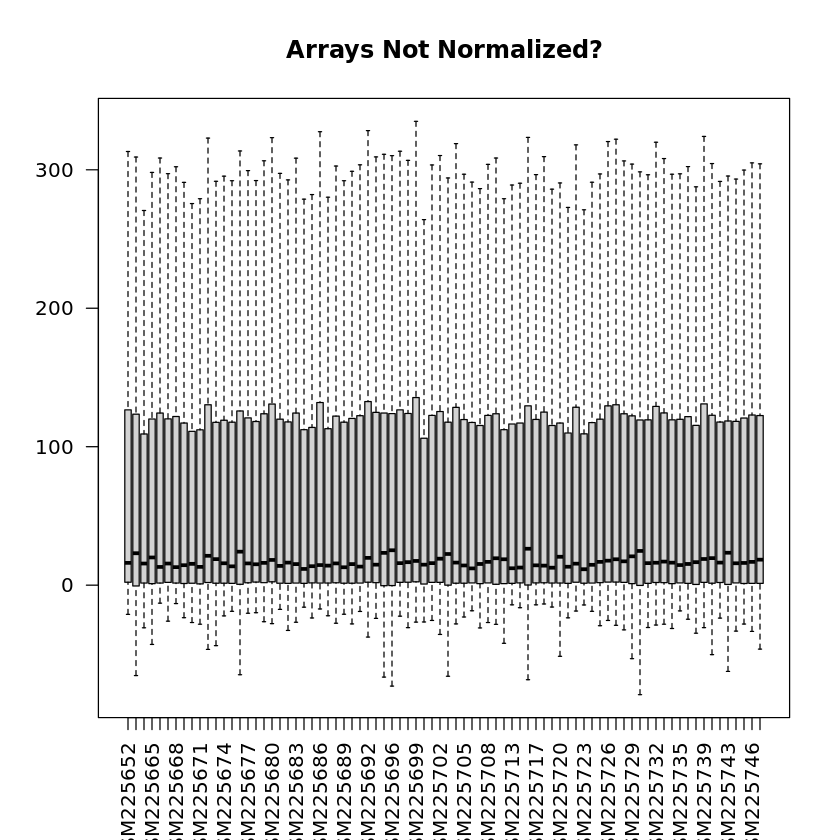

In [10]:
boxplot(exprs(my.geo.gse[, 1:80]), las=2, names=pData(my.geo.gse[, 1:80])$geo_accession, outline=F, main="Arrays Not Normalized?")

In [11]:
suppressPackageStartupMessages(library(lumi))

No methods found in package 'RSQLite' for request: 'dbListFields' when loading 'lumi'



In [12]:
expr.normalised <- rankinvariant(exprs(my.geo.gse), targetArray = NULL, rrc = .05, lowRank = seq(.5, .25, -.05), highRank = .9, minSize = .02, maxit=200)

In [13]:
head(expr.normalised,n=4)

,GSM225652,GSM225662,GSM225664,GSM225665,GSM225666,GSM225667,GSM225668,GSM225669,GSM225670,GSM225671,...,GSM388388,GSM388389,GSM388390,GSM388391,GSM388392,GSM388393,GSM388394,GSM388395,GSM388396,GSM388397
GI_10047089-S,23.16309,3.836578,11.32767,-5.02935,38.70689,25.08687,34.79621,25.08935,18.07375,34.00168,...,4.099944,5.99431,23.27111,-2.953323,-9.112801,-6.612468,-5.142056,-4.94428,37.58895,19.86451
GI_10047091-S,5667.85294,5282.979797,7811.30889,3919.86020,5218.84496,5197.49120,5479.47762,5382.56042,5311.36851,5568.28536,...,1977.232882,2821.92639,3684.40513,2630.531834,501.858067,3696.414913,2626.006858,3798.71046,3618.14234,3159.60286
GI_10047093-S,135.43609,55.531427,75.91005,98.67013,106.80940,99.73601,132.80273,95.52749,107.76843,125.45835,...,89.109999,123.23287,146.35684,91.303423,62.202558,125.192740,120.792101,188.90185,210.38712,211.62897
GI_10047099-S,45.26407,9.847607,18.99157,34.29800,36.77490,51.20406,31.87767,54.29783,29.85184,32.55763,...,84.795234,32.66560,36.96773,28.852287,21.122706,21.346213,23.072701,25.12685,31.59647,27.61356


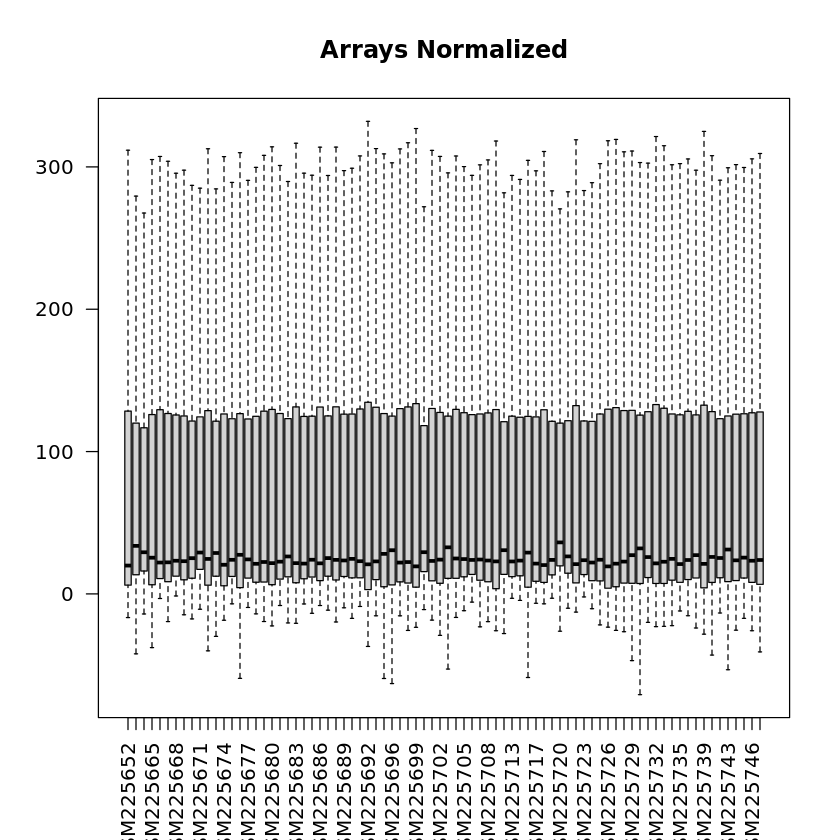

In [14]:
boxplot(expr.normalised[, 1:80], las=2, names=pData(my.geo.gse[, 1:80])$geo_accession, outline=F, main="Arrays Normalized")


In [ ]:
#write.table(expr.log.complete,"/mnt/data/GWES/output/GSE15222/expressionset")

**- Log transformation**

Warning message in hist(log2(expr.normalised)):
"NaNs produced"


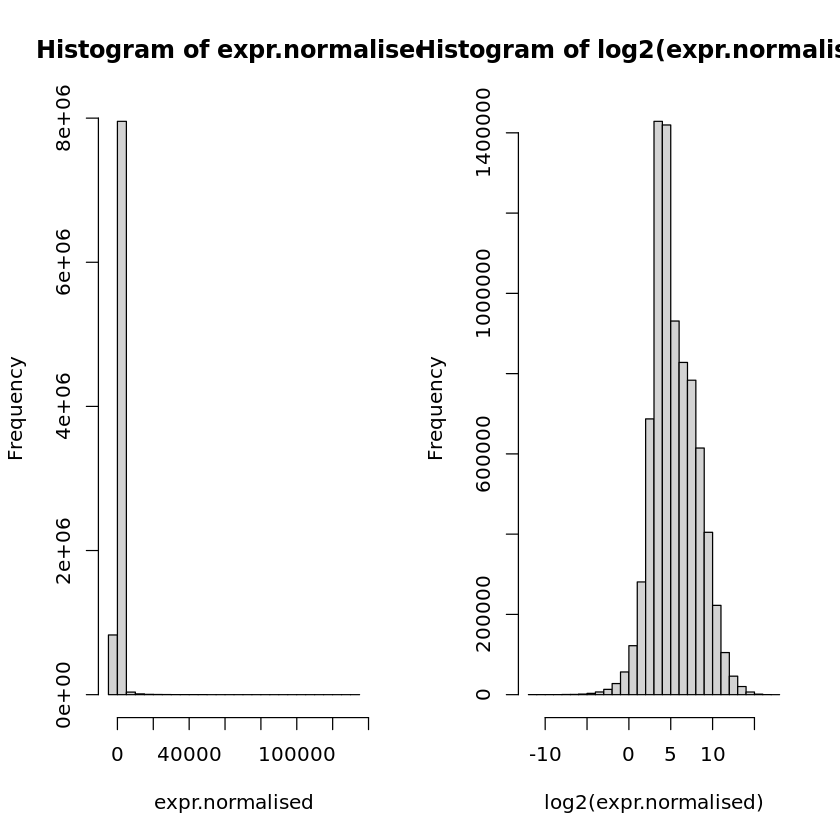

In [15]:
par(mfrow=c(1,2))
hist(expr.normalised)
hist(log2(expr.normalised))

In [16]:
expr.log<-log2(expr.normalised)

Warning message in eval(expr, envir, enclos):
"NaNs produced"


In [17]:
# remove NA and -Inf values
expr.log[sapply(expr.log, is.infinite)] <- NA
expr.log.complete<-expr.log[complete.cases(expr.log), ]
dim(expr.log.complete)

[1] 9592  363

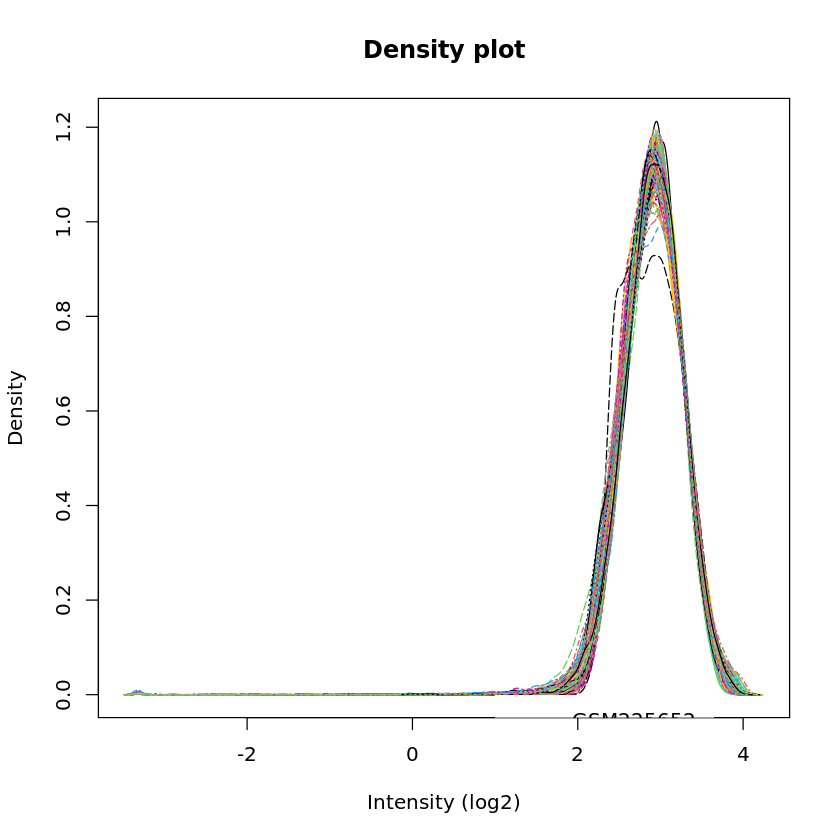

In [18]:
plotDensity(expr.log.complete,legend=FALSE)

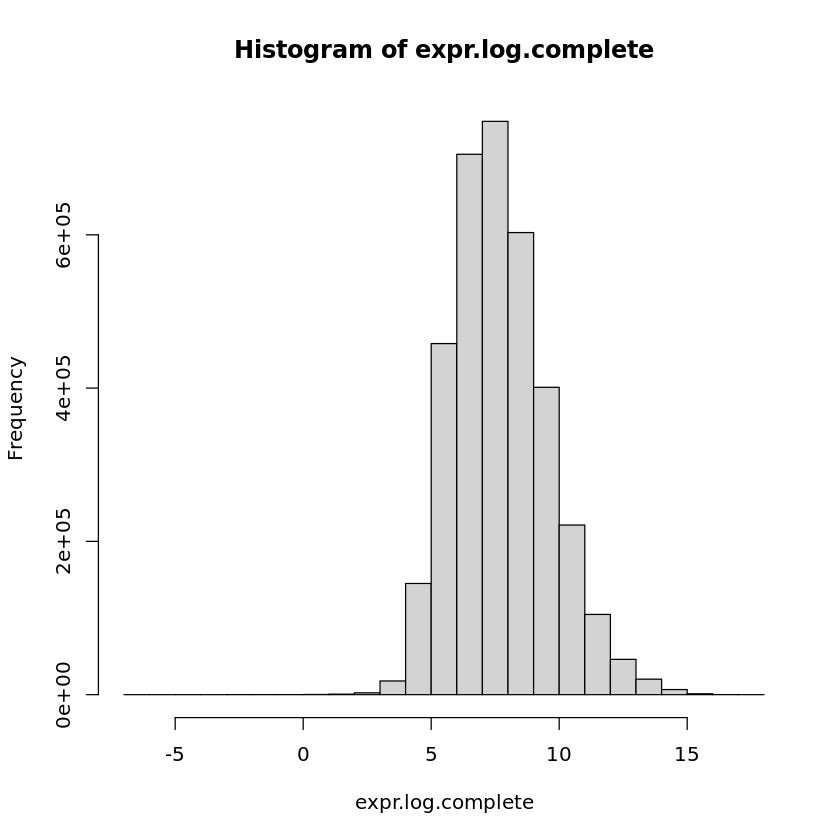

In [19]:
hist(expr.log.complete)

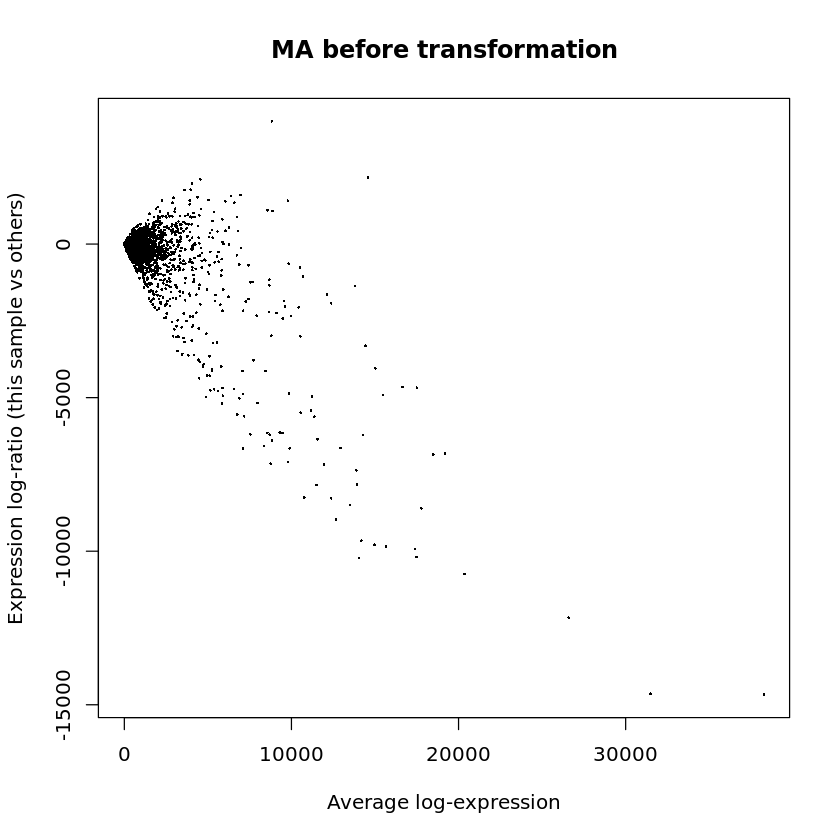

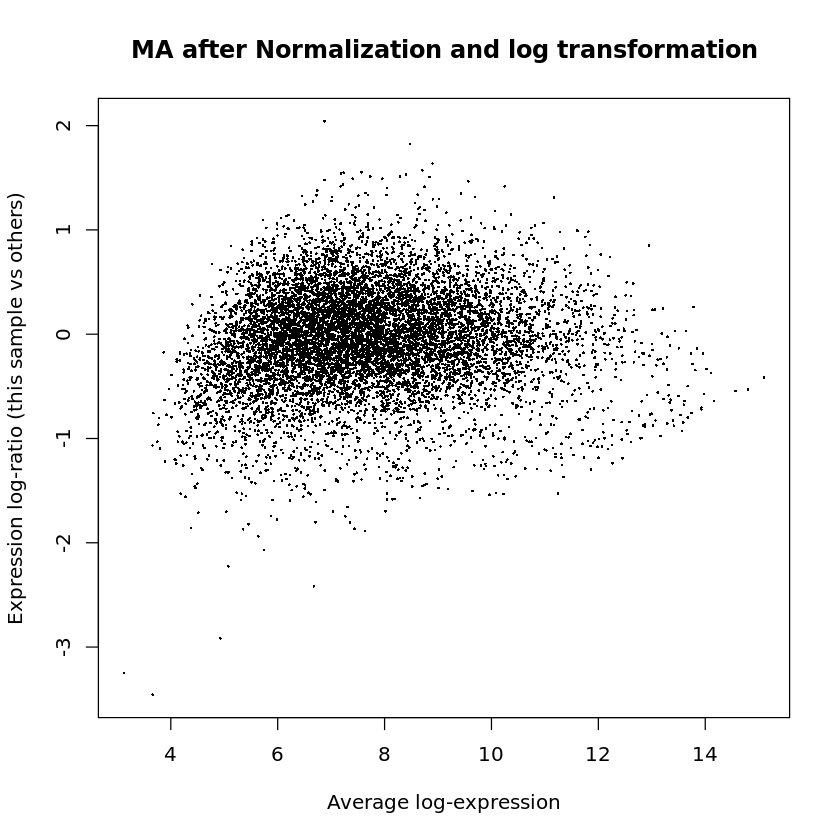

In [20]:
limma::plotMA(exprs(my.geo.gse),main="MA before transformation")
limma::plotMA(expr.log.complete,main="MA after Normalization and log transformation")

**We now have the phenodata and expression data ready. We will be using instead another phenodata that has already been preprocessed to include clear case/control phenotypes and APOE genotypes:**

In [21]:
clinicalset<-read.table("/mnt/data/GWES/Microarray/input/clinicalset.GSE15222")
dim(clinicalset)
head(clinicalset)

[1] 336   5

,sex,age,diagnosis,APOEgeno,APOEgroup
,<chr>,<dbl>,<chr>,<int>,<chr>
GSM388327,Female,85,Case,34,Group4
GSM388385,Male,77,Case,34,Group4
GSM388383,Female,90,Case,44,Group4
GSM388302,Male,73,Case,33,Group3
GSM388303,Female,89,Case,44,Group4
GSM388285,Male,86,Case,33,Group3


**We now have the metadata, phenodata (sample data), and experimental data (microarray intensities) for this experiment. The expression data is in a format that could be used for differential gene expression (DGE) analysis.**

In [22]:
path="/mnt/data/GWES/Microarray/output/GSE15222"
dir.create(file.path(path))

In [23]:
save(expression=expr.log.complete,clinicalset, file=paste(path,"objects.RData",sep="/"))

**For the next step, Differential Expression, you need the following files:**
- objects.RData (containing the expression and phenodata datasets)